In [2]:
import pandas as pd

In [3]:
CCTV_Seoul = pd.read_csv('D:/data/01. Seoul_CCTV.csv')

In [4]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [6]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
CCTV_Seoul.columns[0]

'기관명'

In [8]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '구별'}, inplace=True)

In [9]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [10]:
# 가장 CCTV를 적게 보유한 구
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [11]:
# 가장 CCTV를 많이 보유한 구
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [12]:
CCTV_Seoul['증가율'] = (
    (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
)

CCTV_Seoul.sort_values(by='증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [13]:
# 서울시 인구데이터
pop_Seoul = pd.read_excel('D:/data/01. Seoul_Population.xls',header=2, usecols='B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [14]:
pop_Seoul.rename(
    columns = {
    pop_Seoul.columns[0]: "구별",
    pop_Seoul.columns[1]: '인구수',
    pop_Seoul.columns[2]: '한국인',
    pop_Seoul.columns[3]: '외국인',
    pop_Seoul.columns[4]: '고령자',
    },
    inplace=True,
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [15]:
# 합계 데이터 필요 없음
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [16]:
# 중복 제거,   데이터가 많아지면 unique 조사로 데이터 초반 검증
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [17]:
len(pop_Seoul['구별'].unique())

25

In [18]:
# 외국인, 고령자 비율 추가
pop_Seoul['외국인 비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자 비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()



,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [19]:
# 데이터 두개 병합
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [20]:
# 안쓰는 칼럼 제거
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()


,구별,소계,증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [21]:
# pandas index 지정
# 데이터를 정리하는 과정에서 index를 재지정할 때가 있다
# set_index = index 재지정
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


### 상관 관계 알아보기

In [22]:
# 소계와 가장 상관 관계가 있는 데이터는 인구수 (0.232555)
data_result.corr()

,소계,증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인 비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자 비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [23]:
# CCTV 비율 추가 및 비율이 높은 구 확인
data_result['CCTV 비율'] = data_result['소계'] / data_result['인구수']
data_result['CCTV 비율'] = data_result['CCTV 비율'] * 100
data_result.sort_values(by='CCTV 비율', ascending=False).head(5)


,소계,증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [24]:
import matplotlib.pyplot as plt

In [25]:
import koreanize_matplotlib

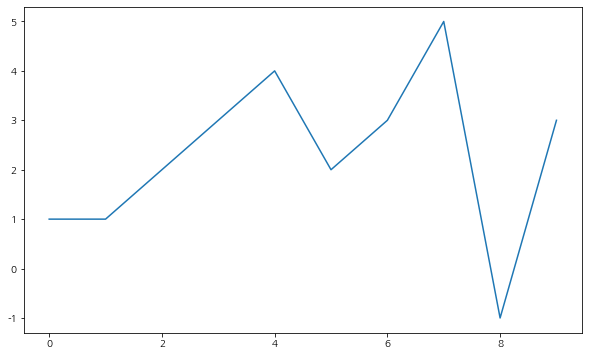

In [27]:
plt.figure(figsize=(10, 6))
plt.plot([0,1,2,3,4,5,6,7,8,9], [1,1,2,3,4,2,3,5,-1,3])
plt.show()

<Axes: xlabel='구별'>

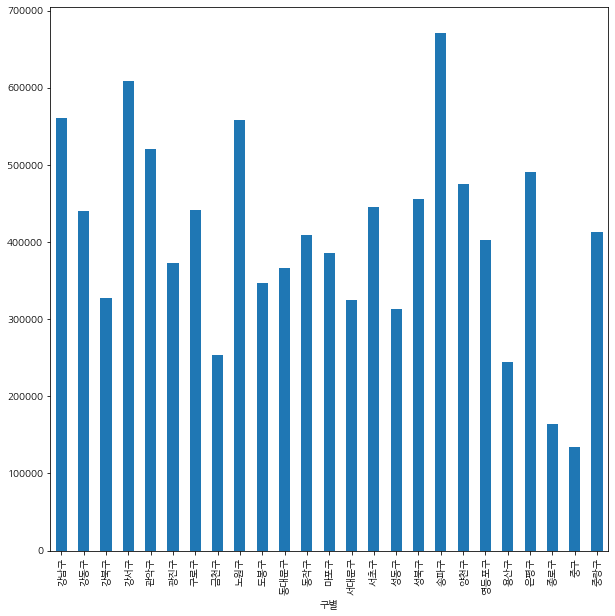

In [28]:
data_result['인구수'].plot(kind='bar', figsize=(10, 10))

<Axes: ylabel='구별'>

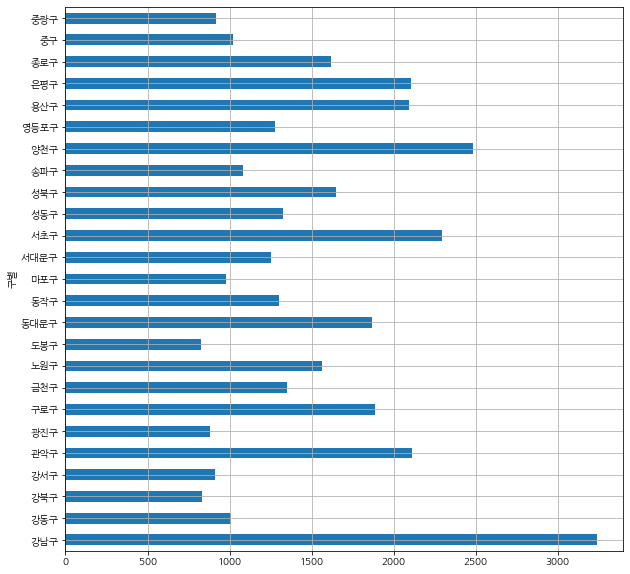

In [29]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10))

In [30]:
def drawGraph():
    data_result['소계'].sort_values().plot(
        kind='barh',
        grid=True,
        title='CCTV 설치 현황',
        figsize=(10,10)
    )
    

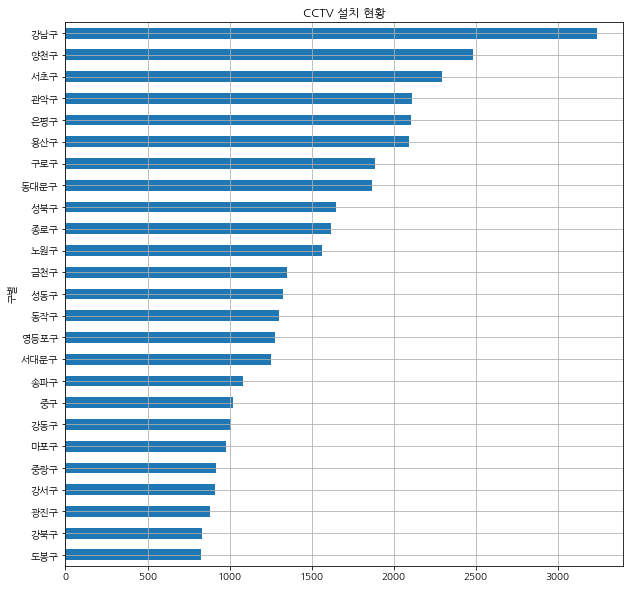

In [31]:
drawGraph()

In [32]:
def drawGraph():
    data_result["CCTV 비율"].sort_values().plot(
        kind='barh',
        grid=True,
        title='CCTV 설치 비율',
        figsize=(10,10)
    )

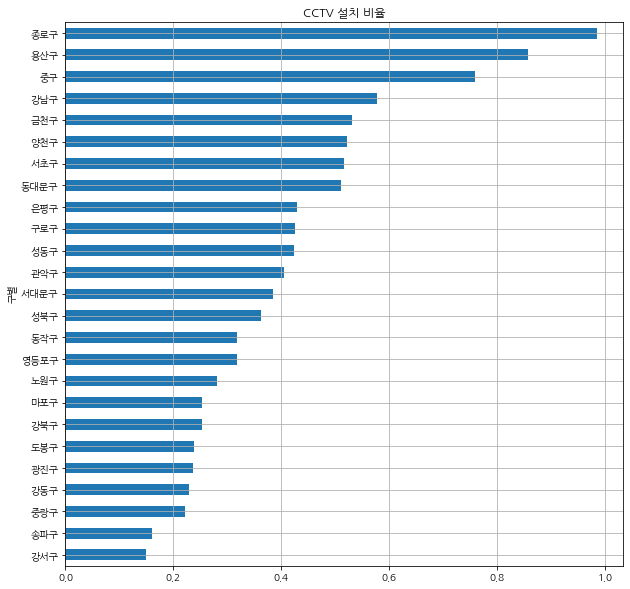

In [33]:
drawGraph()

In [34]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

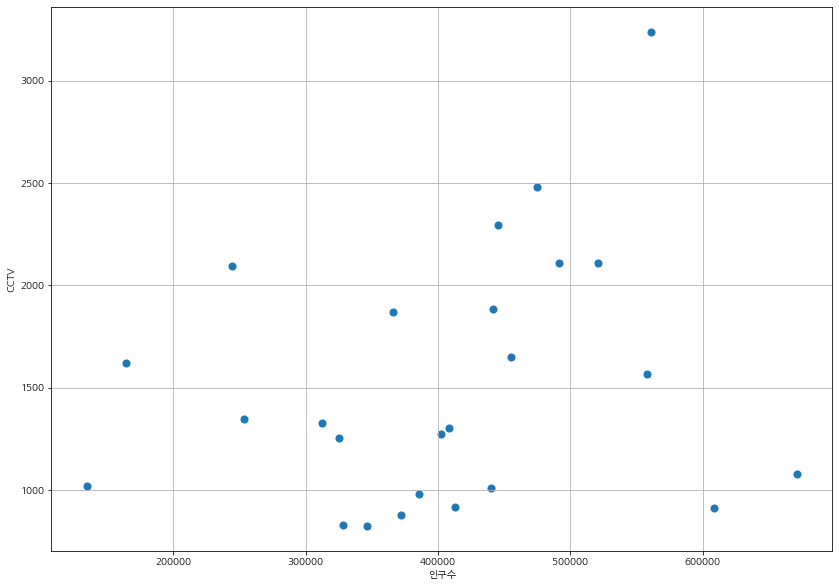

In [35]:
drawGraph()

In [36]:
import numpy as np

In [37]:
# np.polyfit : 직선을 구성하기 위한 계수 계산
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [38]:
# np.poly1d : polyfit으로 만든 계수를 python 에서 사용 가능한 함수로 변환
f1 = np.poly1d(fp1)

In [39]:
# 인구수 400000인 구에서 서울시의 경향에 맞는 CCTV 설치 수
f1(400000)

1509.7809252413338

In [40]:
# 경향 선을 그리기 위한 x 데이터 생성
# np.linspace(a,b,n): a 부터 b까지 n개의 등간격 데이터 생성
fx = np.linspace(100000,700000, 100)

In [41]:
# 시각화
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

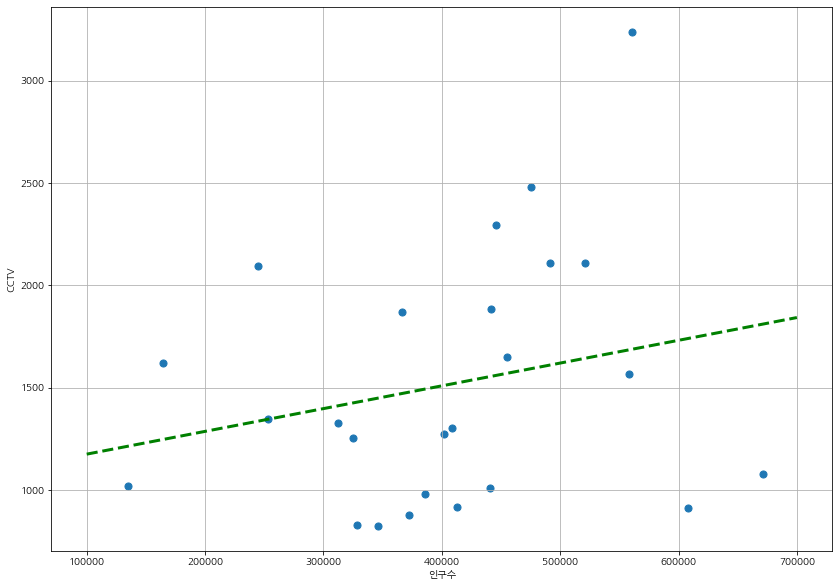

In [42]:
drawGraph()

In [43]:
# 오차 = 현재값 - 경향
data_result['오차'] = data_result['소계'] - f1(data_result['인구수'])

df_sort_f = data_result.sort_values(by='오차', ascending=False) 
df_sort_t = data_result.sort_values(by='오차', ascending=True)

In [44]:
# 경향 대비 CCTV를 많이 가진 구
df_sort_f.head()

,소계,증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [45]:
# 경향 대비 CCTV를 적게 가진 구
df_sort_t.head()

,소계,증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [46]:
from matplotlib.colors import ListedColormap

color_step = ['#01DFA5','#013ADF','#DBA901','#DF013A','#3ADF00','#01DFA5']
my_cmap = ListedColormap(color_step)

In [47]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['소계'],c = data_result['오차'], s=50, cmap=my_cmap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    
    for n in range(5):
        plt.text(
            df_sort_f['인구수'][n] * 1.02,
            df_sort_f['소계'][n] * 0.98,
            df_sort_f.index[n],
            fontsize = 15
        )
        plt.text(
            df_sort_t['인구수'][n] * 1.02,
            df_sort_t['소계'][n] * 0.98,
            df_sort_t.index[n],
            fontsize = 15
        )
    
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid()
    plt.show()

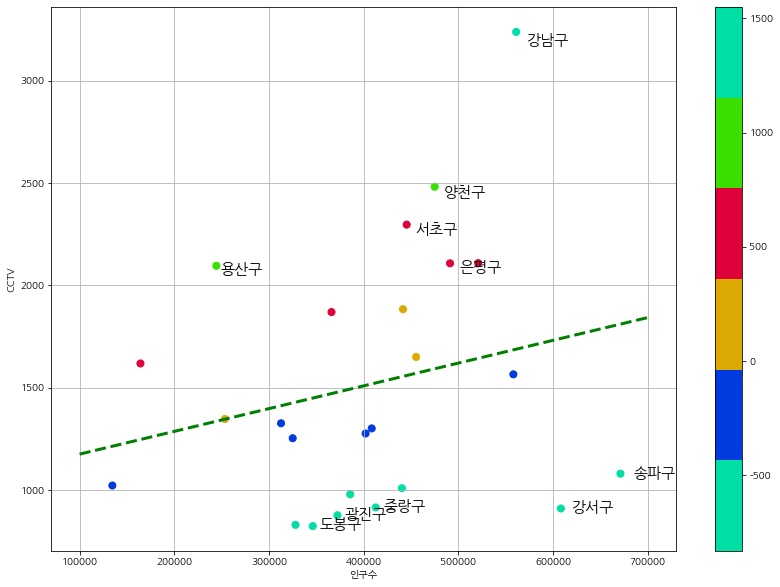

In [48]:
drawGraph()

In [49]:
data_result.to_csv('D:/data/02. CCTV_result.csv', sep=',', encoding='euc-kr')